In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df=pd.read_csv('diabetes.csv',na_values=['?'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
1,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
2,14,175.0,62.0,30.0,NaN,33.6,0.212,38,1
3,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
4,13,104.0,72.0,NaN,NaN,31.2,0.465,38,1
...,...,...,...,...,...,...,...,...,...
763,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
764,0,137.0,84.0,27.0,NaN,27.3,0.231,59,0
765,0,105.0,84.0,NaN,NaN,27.9,0.741,62,1
766,0,161.0,50.0,NaN,NaN,21.9,0.254,65,0


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66cc5fa518>,
      dtype=object)

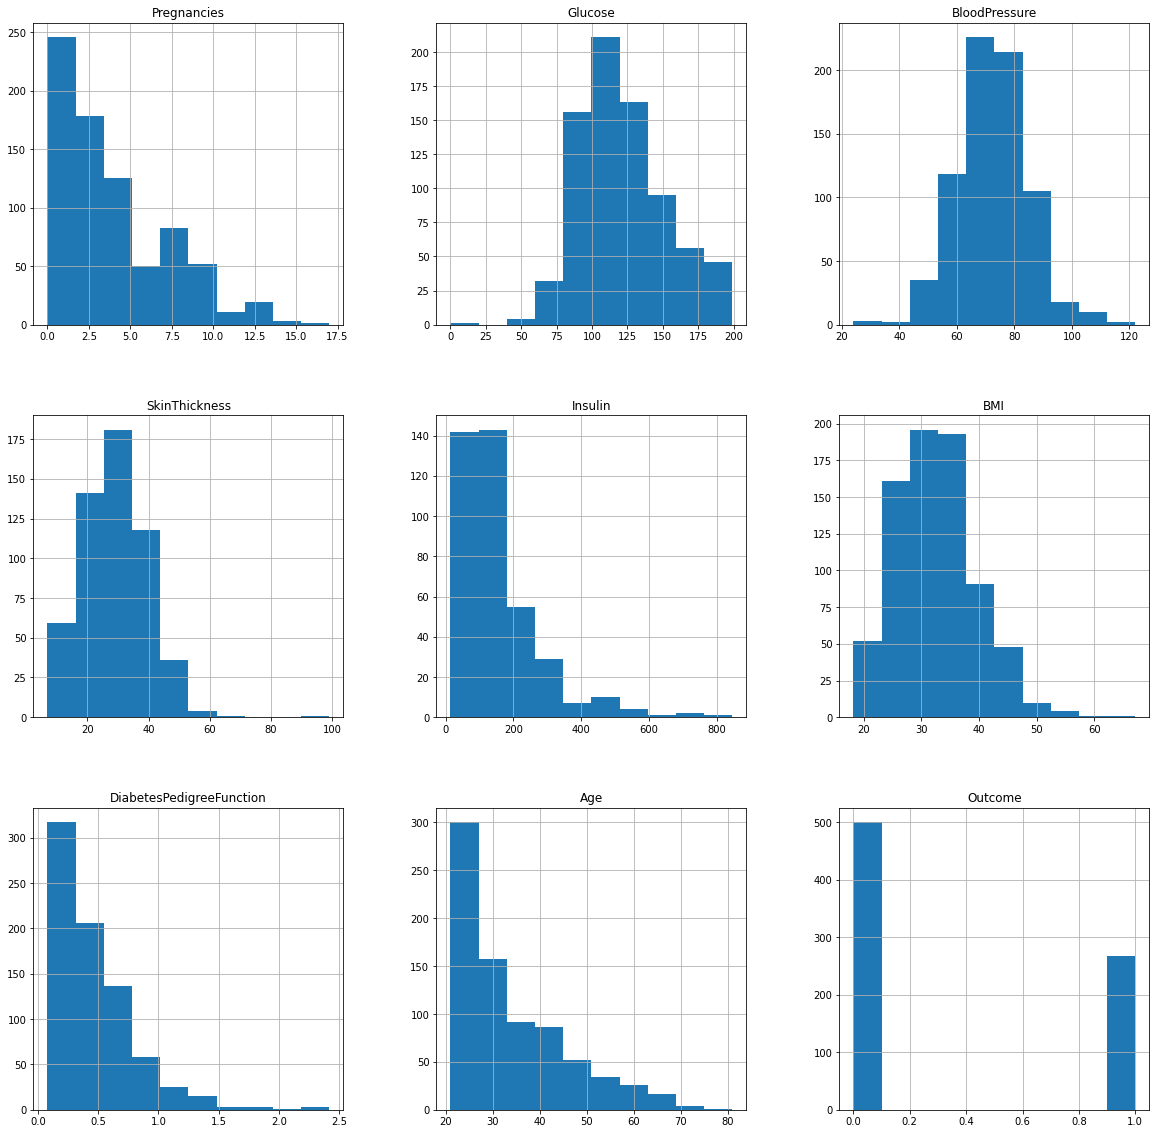

In [ ]:
df.hist(figsize=[20,20])

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      1
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.fillna(df.median(),inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(614, 9)
(614,)
(154, 9)
(154,)


### Before Preprocessing 

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy_score(Y_test,knn.predict(X_test))

0.7142857142857143

### Applying Feature Scaling

In [ ]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['Glucose','BloodPressure','BMI']])
X_test_minmax=min_max.fit_transform(X_test[['Glucose','BloodPressure','BMI']])

In [ ]:
del knn
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.7337662337662337

### Applying Feature Standardization

In [ ]:
X_train_scale = scale(X_train[['Glucose','BloodPressure','BMI']])
X_test_scale = scale(X_test[['Glucose','BloodPressure','BMI']])

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(X_train_scale,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(Y_test,log.predict(X_test_scale))

0.7532467532467533

### Applying One-Hot Encoding

In [ ]:
enc=OneHotEncoder(sparse=False)

In [ ]:
len(df['Outcome'].unique())

2

In [ ]:
X_train_1=X_train
X_test_1=X_test
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
         'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
for col in columns:
    data=X_train[[col]].append(X_test[[col]])
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_train.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train_1=pd.concat([X_train_1,temp],axis=1)
    # fitting One Hot Encoding on test data
    temp = enc.transform(X_test[[col]])
    # changing it into data frame and adding column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # Setting the index for proper concatenation
    temp=temp.set_index(X_test.index.values)
    # adding the new One Hot Encoded varibales to test data frame
    X_test_1=pd.concat([X_test_1,temp],axis=1)
X_train_1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_1',
       ...
       'Age_59', 'Age_65', 'Age_67', 'Age_61', 'Age_69', 'Age_72', 'Age_64',
       'Age_68', 'Age_70', 'Age_81'],
      dtype='object', length=1259)

In [ ]:
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
log.fit(X_train_scale,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(Y_test,log.predict(X_test_scale))

0.9415584415584416